In [453]:
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') 

## load data

In [454]:
data = load_breast_cancer()

In [455]:
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [456]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### develop predictors X and target y dataframes


In [457]:
#YOUR CODE
X = df.drop('target', axis=1)
y = df[['target']]

### split data into train and test set in 80:20 ratio

In [458]:
#YOUR CODE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### classes distribution

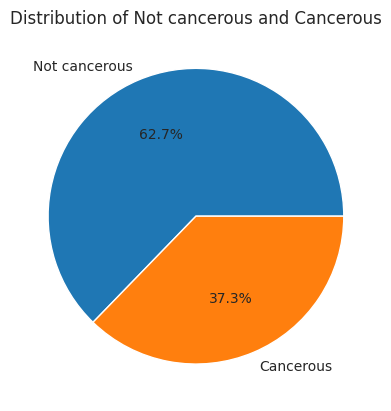

In [459]:
#YOUR CODE
# Compare the distribution of class 0 - Not cancerous (negative) and class 1 - Cancerous (positive) in a pie chart
plt.pie(y.value_counts(), labels=['Not cancerous', 'Cancerous'], autopct='%1.1f%%')
plt.title('Distribution of Not cancerous and Cancerous')
plt.show()

There are two classes in the dataset. 0 refers to ‘Benign’: a non-cancerous state, we simply denote it as ‘negative’. 1 refers to ‘Malignant’: a cancerous state, we simply denote it as ‘positive’. In the dataset, there are 357 negative cases and 212 positive cases. 

## choose a binary classification problem

### build a LDA model with default parameters

In [460]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train) 
preds = model.predict(X_test)

/home/schecter/miniconda3/envs/dsai/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Confusion Matrix

In [461]:
#YOUR CODE
# Calculate and plot confusion matrix
metrics.confusion_matrix(y_test, preds)

array([[36,  4],
       [ 0, 74]])

Should have 114 total test samples, 72 are True Negatives (TN), 36 are True Positives (TP), 6 are False Negatives (FN), and there are no False Positives (FP).


### Accuracy

In [462]:
#YOUR CODE
metrics.accuracy_score(y_test, preds)

0.9649122807017544

### Precision

In [463]:
#YOUR CODE
metrics.precision_score(y_test, preds)

0.9487179487179487

### Recall

In [464]:
#YOUR CODE
metrics.recall_score(y_test, preds)

1.0

### F1-score

In [465]:
#YOUR CODE
metrics.f1_score(y_test, preds)

0.9736842105263158

### Accuracy, Precision, Recall, and F1-score from method classification_report

In [466]:
#YOUR CODE
report = metrics.classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        40
         1.0       0.95      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



### ROC

In [467]:
#YOUR CODE

# calculate prediction probability
y_pred_prob = model.predict_proba(X_test)[:, 1]
# calculate false positive rate, true positive rate, thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
print(f'false positive rate: {fpr}, true positive rate: {tpr}, thresholds: {thresholds}')
# calculate auc score
auc = metrics.roc_auc_score(y_test, preds)
print(f'auc score: {auc}')


false positive rate: [0.  0.1 1. ], true positive rate: [0. 1. 1.], thresholds: [2. 1. 0.]
auc score: 0.9500000000000001


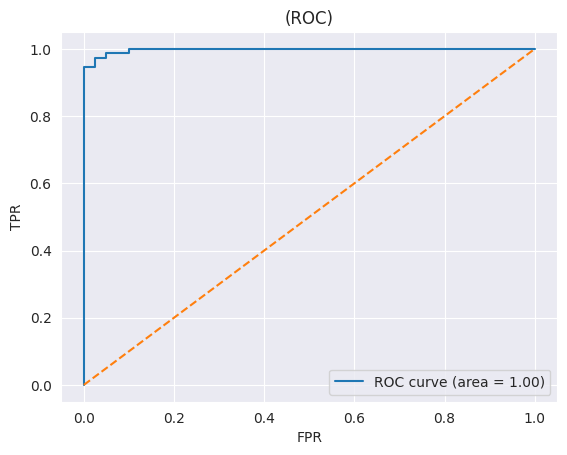

In [468]:
#YOUR CODE

# Plot ROC for training and for test dataset
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('(ROC)')
plt.legend()
plt.show()

What is the value of AUC for training set and test set; explain why the values are what they are?

Tuning ROC to find the optimum threshold value:  find the right value of threshold (cut-off) 

In [469]:
#YOUR CODE
sensitivity = tpr
specificity = 1 - fpr
youden = sensitivity + specificity - 1

optimal_idx = np.argmax(youden)
optimal_threshold = thresholds[optimal_idx]

print('Optimum threshold: ', optimal_threshold)

Optimum threshold:  0.835686229010018
